In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import collections
import csv
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pycircos
from collections import Counter
from IPython.display import display
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

### Display chromosome

- Chromosomes that do not plot the extracted genes are not displayed in the Circos plot.

In [16]:
combined_df_score = pd.read_csv("../data/circos_hr_UP_2311/combined_position_up.tsv", sep='\t')
combined_df_score.sort_values(by=['Chromosome/scaffold name', 'Gene start (bp)'], inplace=True)

# Create list of unique chromosome/scaffold name
unique_chromosomes = combined_df_score['Chromosome/scaffold name'].unique()

display(combined_df_score)

Gene stable ID Chromosome/scaffold name  HN-score(HN5) organism  \
123  ENSG00000177606                      H_1             63    human   
13   ENSG00000162616                      H_1            149    human   
162  ENSG00000117598                      H_1             57    human   
116  ENSG00000163352                      H_1             65    human   
105  ENSG00000196189                      H_1             67    human   
..               ...                      ...            ...      ...   
271     Os09g0494500                      R_9             98     rice   
384     Os09g0515550                      R_9             61     rice   
467     Os09g0526600                      R_9             52     rice   
374     Os09g0526650                      R_9             62     rice   
435     Os09g0558900                      R_9             55     rice   

     Gene start (bp)  Gene end (bp)  
123       58776845.0     58784048.0  
13        77979175.0     78017964.0  
162       98890245.0     99227929.0  
116      154993586.0    154994315.0  
105      156147366.0    156177752.0  
..               ...            ...  
271       19158203.0     19159173.0  
384       20083070.0     20083372.0  
467       20591252.0     20595143.0  
374       20593763.0     20595047.0  
435       22212492.0     22218155.0  

[589 rows x 6 columns]

In [4]:
#organism = "human"
df = pd.read_csv("../data/chromosome/chromosome_human.tsv", sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'H_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'human'# assign the tag
df_subset = df_subset[df_subset['chr'].isin(unique_chromosomes)]

# organism = "rice" 
df1 = pd.read_csv("../data/chromosome/chromosome_rice.tsv", sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# assign the tag
df1_subset = df1_subset[df1_subset['chr'].isin(unique_chromosomes)]
combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)

display(combined_df)

chr  start        end organism
0    H_1      1  248956422    human
1    H_2      1  242193529    human
2    H_3      1  198295559    human
3    H_4      1  190214555    human
4    H_5      1  181538259    human
5    H_6      1  170805979    human
6    H_7      1  159345973    human
7    H_8      1  145138636    human
8    H_9      1  138394717    human
9   H_10      1  133797422    human
10  H_11      1  135086622    human
11  H_12      1  133275309    human
12  H_13      1  114364328    human
13  H_14      1  107043718    human
14  H_15      1  101991189    human
15  H_16      1   90338345    human
16  H_17      1   83257441    human
17  H_18      1   80373285    human
18  H_19      1   58617616    human
19  H_20      1   64444167    human
20  H_21      1   46709983    human
21  H_22      1   50818468    human
22   H_X      1  156040895    human
23   R_1      1   43270923     rice
24   R_2      1   35937250     rice
25   R_3      1   36413819     rice
26   R_4      1   35502694     rice
27   R_5      1   29958434     rice
28   R_6      1   31248787     rice
29   R_7      1   29697621     rice
30   R_8      1   28443022     rice
31   R_9      1   23012720     rice
32  R_10      1   23207287     rice
33  R_11      1   29021106     rice
34  R_12      1   27531856     rice

In [5]:
# Initialize
circle = Gcircle(figsize=(20,20))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # get the chromosome number
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'human':
            color = plt.cm.Blues(chrom_number / 24)  # change the color dynamically based on 22+X+Y
        else:
            color = plt.cm.Greens(chrom_number / 14)  # change the color dynamically based on 12+X+Y
    except ValueError:  # if chrom_number is not a number
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.2, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 2000x2000 with 0 Axes>

In [6]:
circle.set_garcs(0,360)

In [7]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

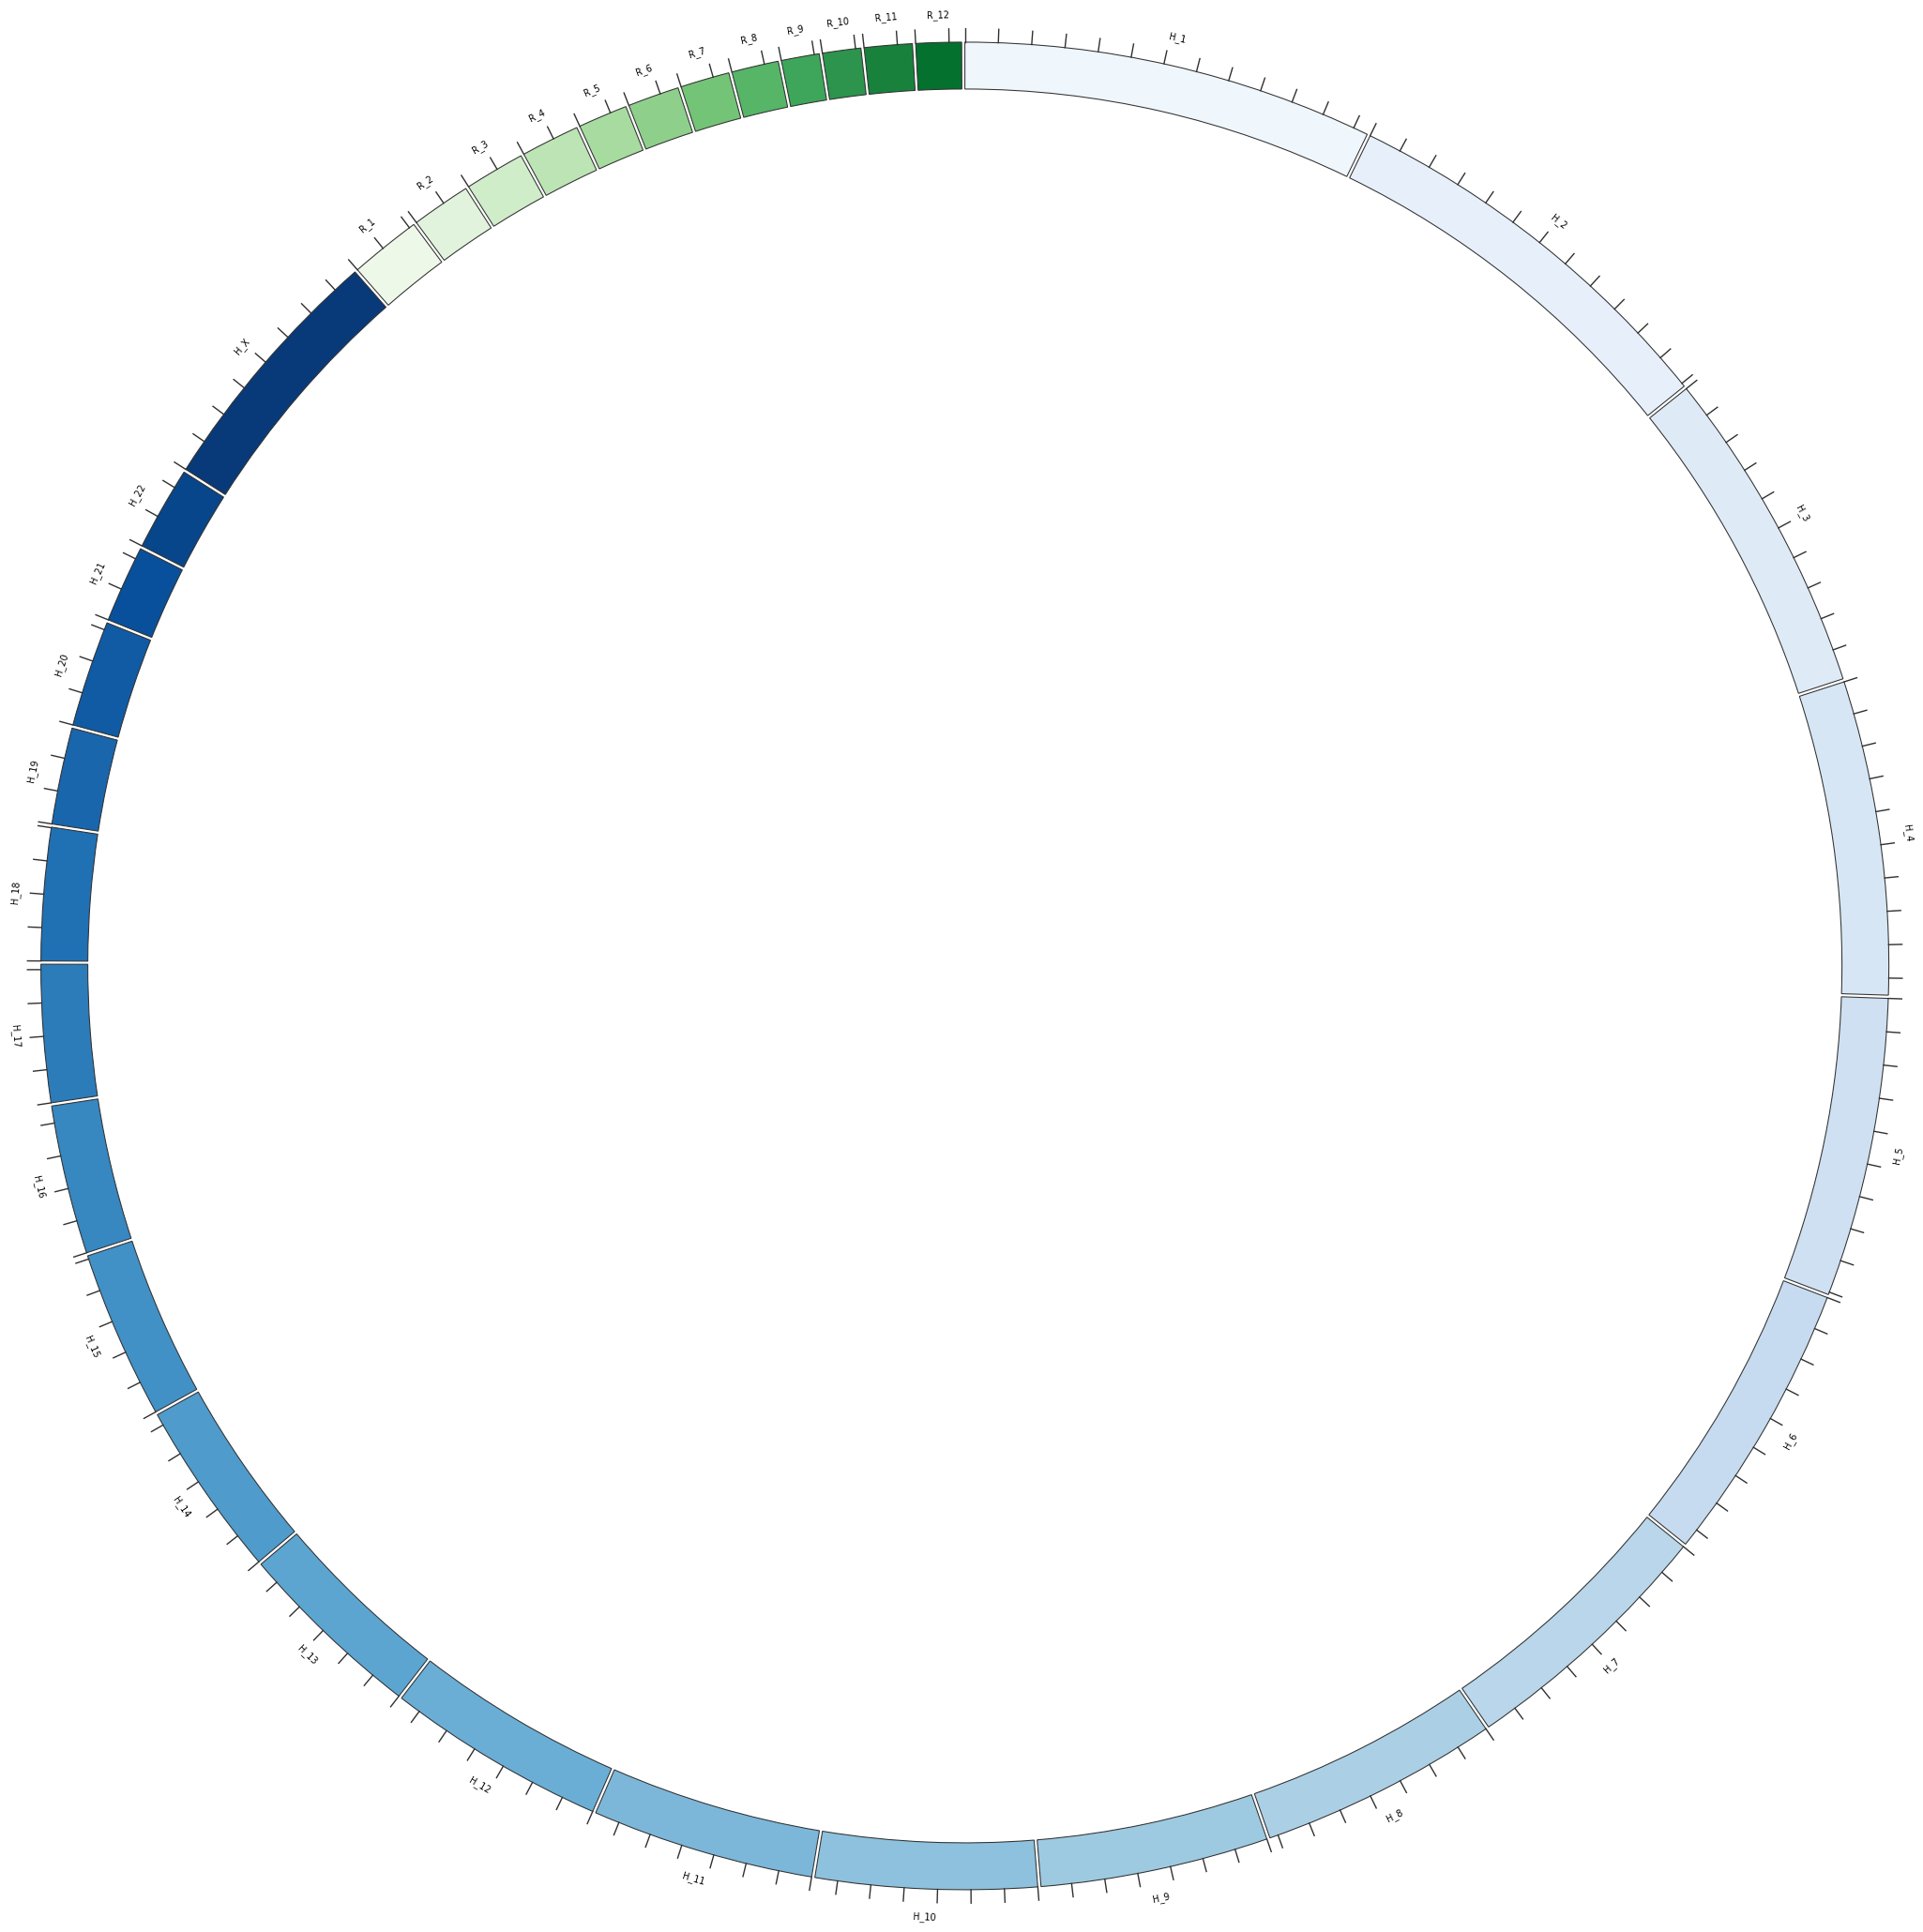

In [8]:
circle.figure

## Scatter plot of human vs rice upregulated genes

In [9]:
# Initialize
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # if the key is not in the dictionary, add it
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )

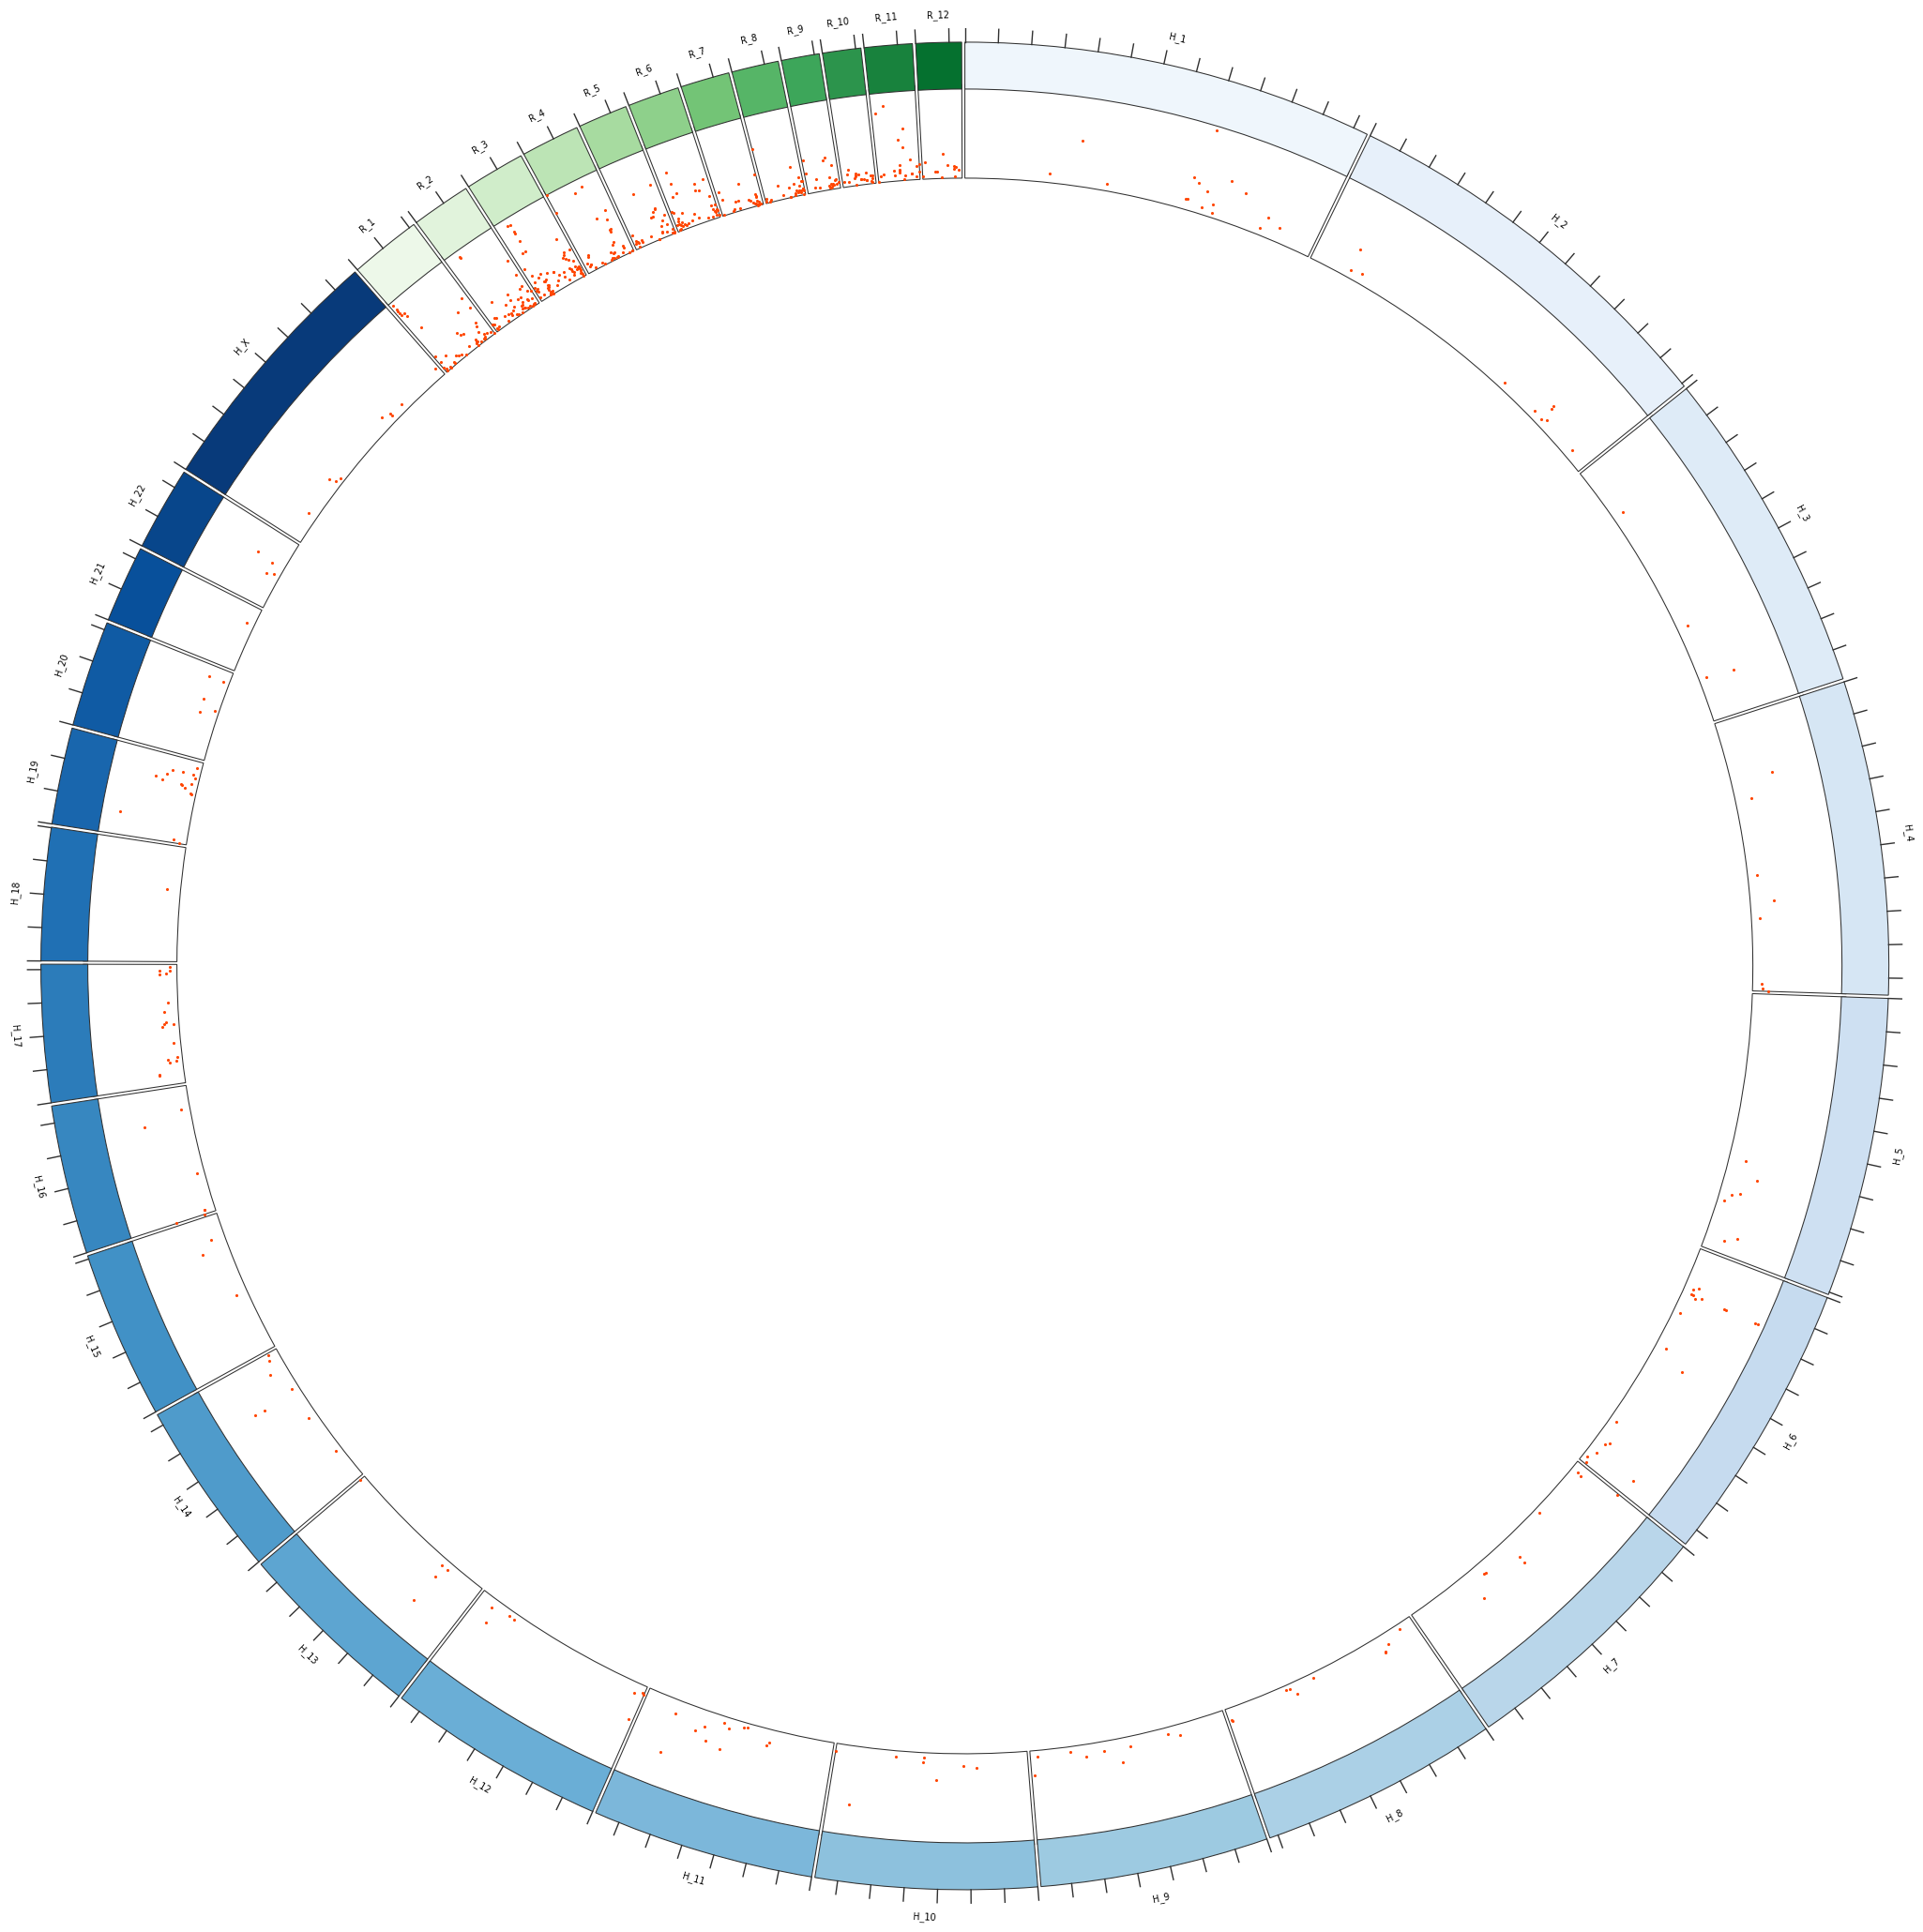

In [10]:
circle.figure

## linkplot of GOslim terms for human vs rice upregulated genes (fold_enrichment)

In [11]:
merged_df_goslim_sorted = pd.read_csv("../data/circos_hr_UP_2311/combined_goslim_enrichment_UP.tsv", sep='\t')
display(merged_df_goslim_sorted)

GOSlim GOSlim GOA Accession(s)  \
0             GO:0005783: endoplasmic reticulum              GO:0005783   
1             GO:0005783: endoplasmic reticulum              GO:0005783   
2             GO:0005783: endoplasmic reticulum              GO:0005783   
3             GO:0005783: endoplasmic reticulum              GO:0005783   
4             GO:0005783: endoplasmic reticulum              GO:0005783   
...                                         ...                     ...   
15167  GO:0005198: structural molecule activity              GO:0005198   
15168  GO:0005198: structural molecule activity              GO:0005198   
15169  GO:0005198: structural molecule activity              GO:0005198   
15170  GO:0005198: structural molecule activity              GO:0005198   
15171                      GO:0005840: ribosome              GO:0005840   

             GOSlim GOA Description       GOSlim_domain Gene stable ID_rice  \
0             endoplasmic reticulum  cellular_component        Os03g0822700   
1             endoplasmic reticulum  cellular_component        Os03g0263700   
2             endoplasmic reticulum  cellular_component        Os06g0593100   
3             endoplasmic reticulum  cellular_component        Os08g0442200   
4             endoplasmic reticulum  cellular_component        Os03g0263700   
...                             ...                 ...                 ...   
15167  structural molecule activity  molecular_function        Os01g0105800   
15168  structural molecule activity  molecular_function        Os03g0276700   
15169  structural molecule activity  molecular_function        Os03g0276700   
15170  structural molecule activity  molecular_function        Os01g0105800   
15171                      ribosome  cellular_component        Os11g0303800   

      Gene stable ID_human Chromosome/scaffold name_rice  start1 (bp)  \
0          ENSG00000160963                           R_3     34536280   
1          ENSG00000170345                           R_3      8668092   
2          ENSG00000204388                           R_6     23303671   
3          ENSG00000204388                           R_8     21549721   
4          ENSG00000204388                           R_3      8668092   
...                    ...                           ...          ...   
15167      ENSG00000109846                           R_1       306871   
15168      ENSG00000109846                           R_3      9375984   
15169      ENSG00000112110                           R_3      9375984   
15170      ENSG00000112110                           R_1       306871   
15171      ENSG00000112110                          R_11     11436951   

       end1 (bp) Chromosome/scaffold name_human  start2 (bp)  end2 (bp)  \
0       34539296                            H_7    101362875  101559024   
1        8671028                           H_14     75278826   75282230   
2       23306966                            H_6     31827738   31830254   
3       21551326                            H_6     31827738   31830254   
4        8671028                            H_6     31827738   31830254   
...          ...                            ...          ...        ...   
15167     308842                           H_11    111908564  111923722   
15168    9377688                           H_11    111908564  111923722   
15169    9377688                            H_6    159789812  159798436   
15170     308842                            H_6    159789812  159798436   
15171   11446262                            H_6    159789812  159798436   

       HN-score(HN5)_rice  HN-score(HN5)_human  counts_up  fold_enrichment  \
0                      50                   67        588         4.159016   
1                      48                  165        588         4.159016   
2                      48                  231        588         4.159016   
3                      48                  231        588         4.159016   
4                      

In [12]:
# Add color data to 'fold_enrichment' column
min_enrichment = merged_df_goslim_sorted['fold_enrichment'].min()
max_enrichment = merged_df_goslim_sorted['fold_enrichment'].max()

color_number = len(merged_df_goslim_sorted['GOSlim'].unique())

# palette = sns.diverging_palette(250, 15, s=75, l=40, n=color_number, center="light")
palette = sns.color_palette("Reds_r", n_colors=color_number)

# def get_color(value, min_value, max_value, palette, color_number):
#    normalized = (value - min_value) / (max_value - min_value)
#    index = int(normalized * (color_number - 1))
#    return palette[index]

# ontology_color_dict = {}
# for index, row in merged_df_goslim_sorted.iterrows():
#    ontology = row['GOSlim']
#    fold_enrichment = row['fold_enrichment']
#    color = get_color(fold_enrichment, min_enrichment, max_enrichment,palette,color_number)

ontology_color_dict = {}
unique_goslims = merged_df_goslim_sorted['GOSlim'].unique()
for i, ontology in enumerate(unique_goslims):
    color = palette[i % color_number]
    ontology_color_dict[ontology] = color

# add to garc_dict
for term, color in ontology_color_dict.items():
    circle._garc_dict[term] = {'facecolor': color, 'edgecolor': color}

In [13]:
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)

def get_linewidth(value, min_value, max_value, min_linewidth, max_linewidth):
    normalized = (value - min_value) / (max_value - min_value) 
    return min_linewidth + (max_linewidth - min_linewidth) * normalized

min_linewidth = 1 * 10**-150
max_linewidth = 0.002

for index, row in merged_df_goslim_sorted.iterrows():
    name1 = row['Chromosome/scaffold name_rice'] # rice
    start1 = int(row['start1 (bp)'])
    end1 = int(row['end1 (bp)'])
    name2 = row['Chromosome/scaffold name_human'] # human
    start2 = int(row['start2 (bp)'])
    end2 = int(row['end2 (bp)'])
    ontology = row['GOSlim']
    fold_enrichment = row['fold_enrichment']
    linewidth = get_linewidth(fold_enrichment, 
                              min_enrichment, 
                              max_enrichment, 
                              min_linewidth, 
                              max_linewidth)
        
    source = (name1, start1, end1, 840)
    destination = (name2, start2, end2, 840)
    circle.chord_plot(source, 
                        destination, 
                        facecolor=circle._garc_dict[ontology]['facecolor'],
                        linewidth=linewidth,
                        edgecolor=circle._garc_dict[ontology]['edgecolor']
                )

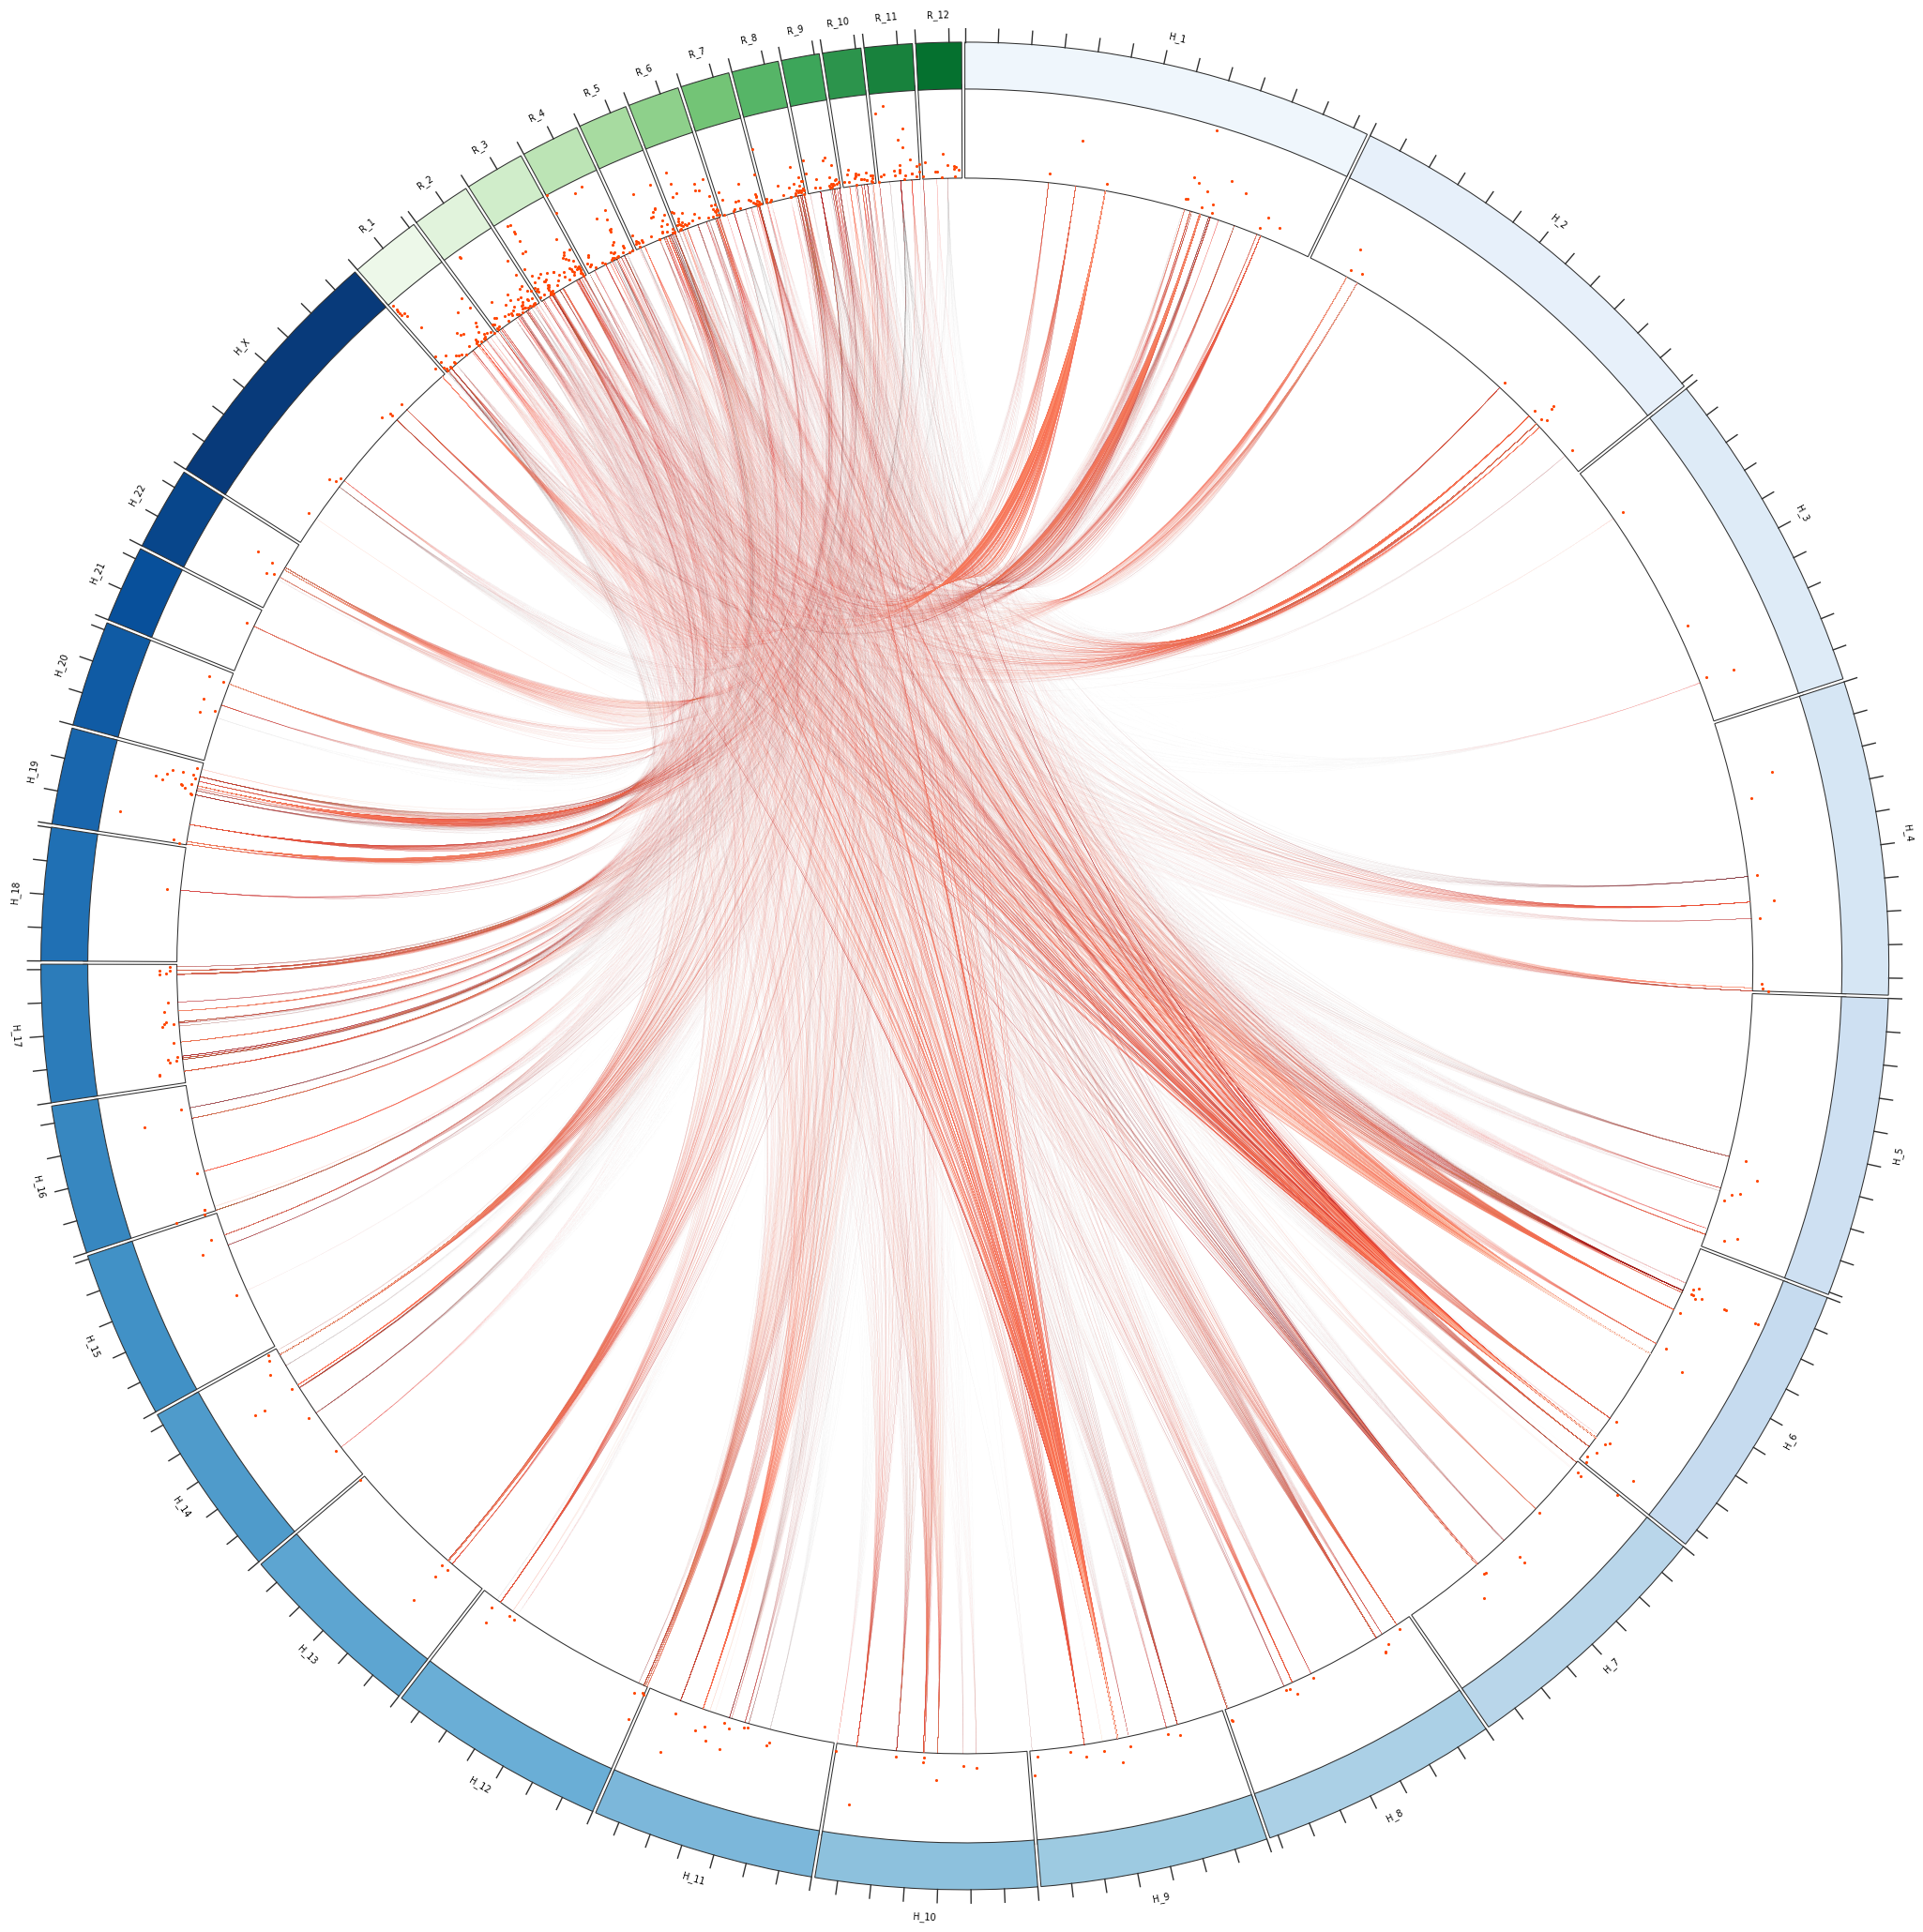

In [14]:
circle.figure

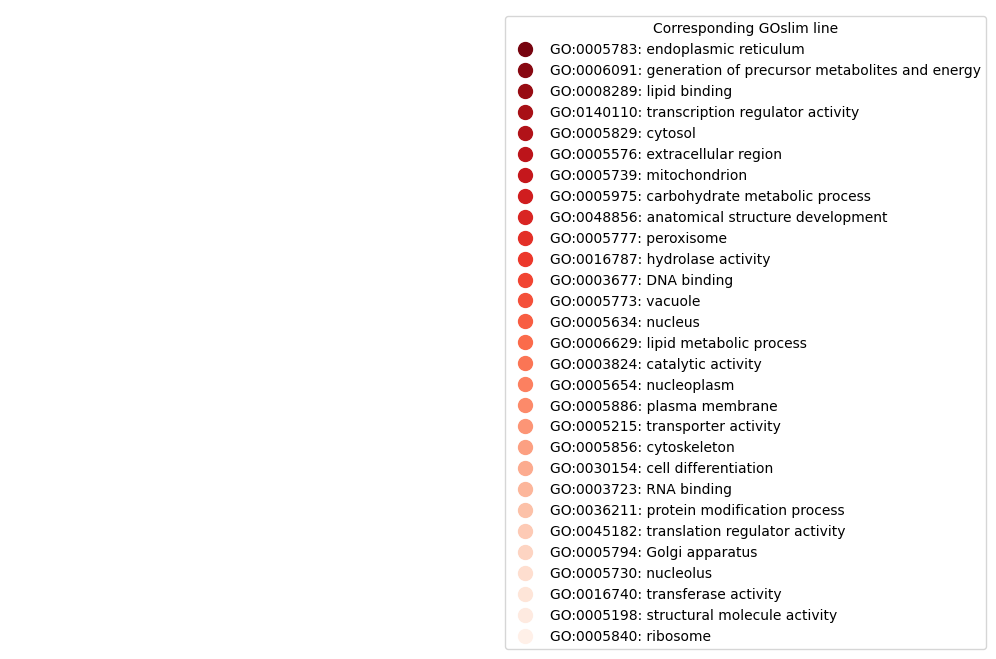

In [15]:
# add legend as a independent figure
fig, ax = plt.subplots(figsize=(6, 6))
for ontology, color in ontology_color_dict.items():
    ax.plot([], [], 
            label=ontology, 
            color=color, 
            marker='o', 
            markersize=10, 
            linestyle='None')

ax.legend(title="Corresponding GOslim line", 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')
ax.axis('off')
plt.show()
